In [32]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

import joblib

# Ruta al archivo en tu Drive
ruta_modelo = "/content/drive/MyDrive/Materias quinto/Datathon 2025/modelo_lgbm.pkl"

# Cargar el modelo
modelo = joblib.load(ruta_modelo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import io
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
data_test = pd.read_csv('/content/drive/MyDrive/Materias quinto/Datathon 2025/df_test_reto.csv')

In [22]:
# data_test.drop(['DATASET'], axis=1, inplace=True)
data_test.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,latitud,longitud,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MES_ID,VENTA_TOTAL,SUPERA_META,AÑO,num_competidores_cercanos,supera_7veces
0,10,2,1,2,0.00,0,0,26.02203,-98.27759,1,5,TEST,202405,669062.13,1,2024,34,1
1,20,6,1,2,100.00,10,0,25.58304,-99.99446,1,5,TEST,202405,1162635.73,1,2024,20,1
2,30,6,1,2,81.00,8,0,24.85727,-99.55978,1,5,TEST,202405,1193543.95,1,2024,36,0
3,40,6,1,4,79.71,12,6,25.30376,-100.00144,2,4,TEST,202405,2282472.88,1,2024,0,1
4,50,4,3,1,97.46,12,9,25.64554,-100.11852,1,1,TEST,202406,1621571.43,1,2024,48,1


In [24]:
# prompt: drop DATASET from data_test

data_test.drop(['DATASET'], axis=1, inplace=True)
data_test.head()


,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,latitud,longitud,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,MES_ID,VENTA_TOTAL,SUPERA_META,AÑO,num_competidores_cercanos,supera_7veces
0,10,2,1,2,0.00,0,0,26.02203,-98.27759,1,5,202405,669062.13,1,2024,34,1
1,20,6,1,2,100.00,10,0,25.58304,-99.99446,1,5,202405,1162635.73,1,2024,20,1
2,30,6,1,2,81.00,8,0,24.85727,-99.55978,1,5,202405,1193543.95,1,2024,36,0
3,40,6,1,4,79.71,12,6,25.30376,-100.00144,2,4,202405,2282472.88,1,2024,0,1
4,50,4,3,1,97.46,12,9,25.64554,-100.11852,1,1,202406,1621571.43,1,2024,48,1


In [26]:
# prompt: from data_test, change the name of the column supera_7veces to SUPERA_META_VENTAS

data_test = data_test.rename(columns={'supera_7veces': 'SUPERA_META_VENTAS'})
data_test.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,latitud,longitud,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,MES_ID,VENTA_TOTAL,SUPERA_META,AÑO,num_competidores_cercanos,SUPERA_META_VENTAS
0,10,2,1,2,0.00,0,0,26.02203,-98.27759,1,5,202405,669062.13,1,2024,34,1
1,20,6,1,2,100.00,10,0,25.58304,-99.99446,1,5,202405,1162635.73,1,2024,20,1
2,30,6,1,2,81.00,8,0,24.85727,-99.55978,1,5,202405,1193543.95,1,2024,36,0
3,40,6,1,4,79.71,12,6,25.30376,-100.00144,2,4,202405,2282472.88,1,2024,0,1
4,50,4,3,1,97.46,12,9,25.64554,-100.11852,1,1,202406,1621571.43,1,2024,48,1


In [27]:
X_prueba = data_test[[
    'num_competidores_cercanos',
    'longitud',
    'latitud',
    'MTS2VENTAS_NUM',
    'ENTORNO_DES',
    'PUERTASREFRIG_NUM',
    'CAJONESESTACIONAMIENTO_NUM',
    'SEGMENTO_MAESTRO_DESC'
]]

# Si tu archivo de prueba ya tiene etiquetas reales:
y_prueba = data_test['SUPERA_META_VENTAS']


In [28]:
y_pred = modelo.predict(X_prueba)

In [29]:
print("Accuracy:", accuracy_score(y_prueba, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_prueba, y_pred))


Accuracy: 0.8786407766990292

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.15      0.12      0.14        16
           1       0.93      0.94      0.93       190

    accuracy                           0.88       206
   macro avg       0.54      0.53      0.54       206
weighted avg       0.87      0.88      0.87       206




Peso/Impacto de cada variable (Feature Importance):

                     Variable  Importancia
2                     latitud          749
1                    longitud          710
0   num_competidores_cercanos          615
3              MTS2VENTAS_NUM          407
4                 ENTORNO_DES          238
5           PUERTASREFRIG_NUM          129
6  CAJONESESTACIONAMIENTO_NUM           86
7       SEGMENTO_MAESTRO_DESC           66


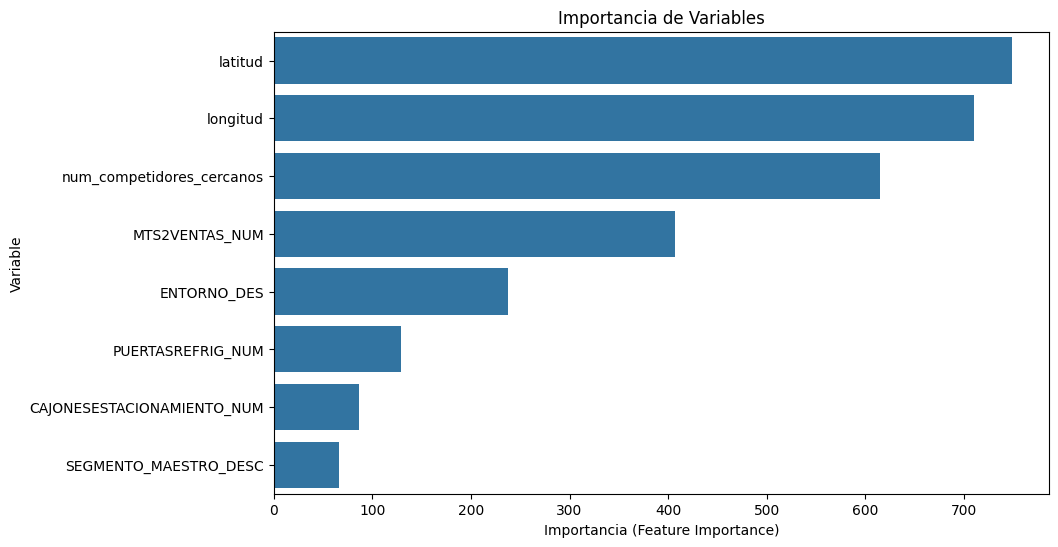

In [33]:
# prompt: dame un código que muestre el peso/impacto de cada variable

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained LGBM model
feature_importances = modelo.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Variable': X_prueba.columns,
    'Importancia': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Print the feature importances
print("\nPeso/Impacto de cada variable (Feature Importance):\n")
print(importance_df)

# Optional: Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de Variables')
plt.xlabel('Importancia (Feature Importance)')
plt.ylabel('Variable')
plt.show()

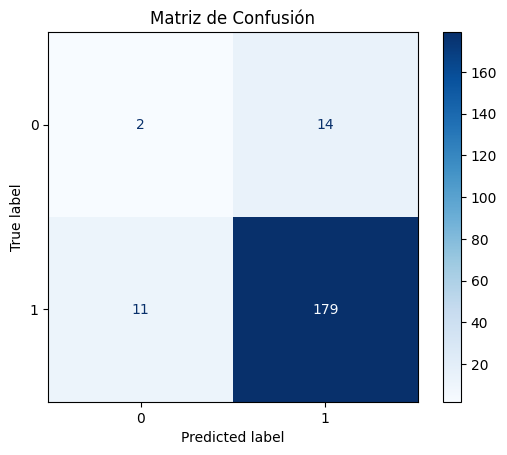

In [17]:
# Generar matriz de confusión
cm = confusion_matrix(y_prueba, y_pred)

# Mostrar matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap="Blues", values_format="d")

plt.title("Matriz de Confusión")
plt.grid(False)
plt.show()